импорты и константы

In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import shutil

# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884.2712384333286764 - 153.8336486816406250) / 2136

# номера точек в массиве по координате х
start_point = round((start - 153.8336486816406250) / step)
end_point = start_point + int((end - start) / step)


x = np.arange(start + step, end, step)

функции получения данных

In [2]:
def get_max_rmr(path):
    """получение листа с максимуми в первой половине графика"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _dm = []
    _start=start_point + 11 
    _end=start_point+round((end_point-start_point)/2)
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _dm.append(np.max(np.array(spec[_start:_end],dtype=float)))
    #    _data.append(get_rmr(spec))
    return _dm


получение максимумов из спектров

In [59]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_max = []  # изанчальные графики
script_path = os.path.dirname(os.path.abspath("sorter.ipynb"))
main_folder = r"C:\Users\Nik\Desktop\prog\п3"
main_folder = main_folder.replace(chr(92), "/")

print(main_folder)

#data_max= get_max_rmr(main_folder+'/')
data_max=get_max_rmr(script_path+'/')
print("получено "+str(len(data_max)) + " максимумов спектров")


C:/Users/Nik/Desktop/prog/п3
получено 2993 максимумов спектров


максимумы на таймлайнах

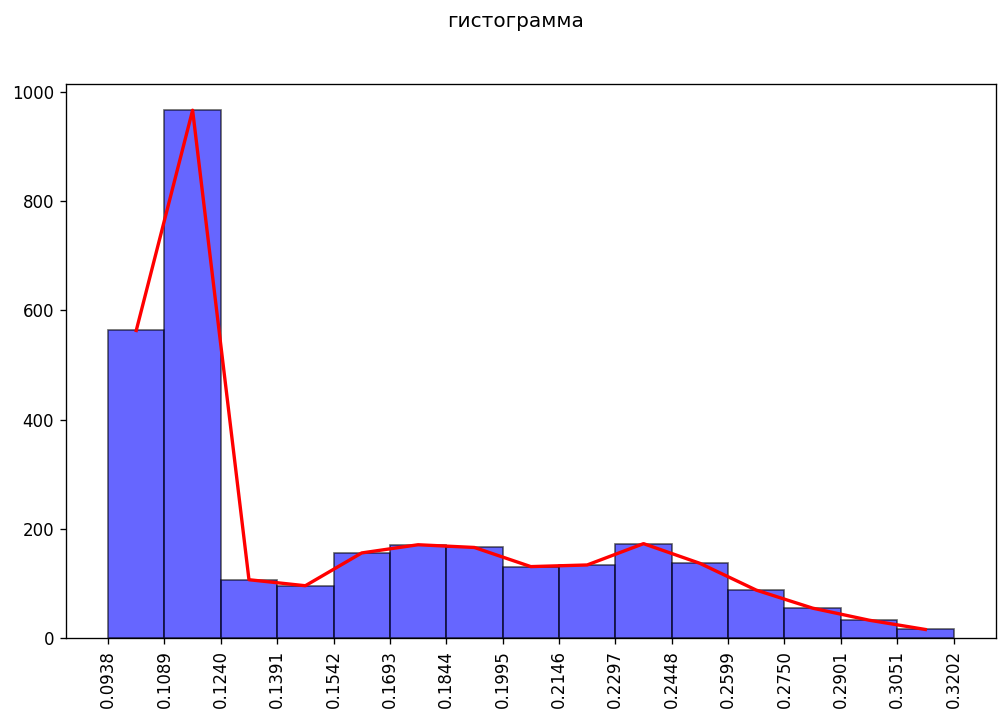

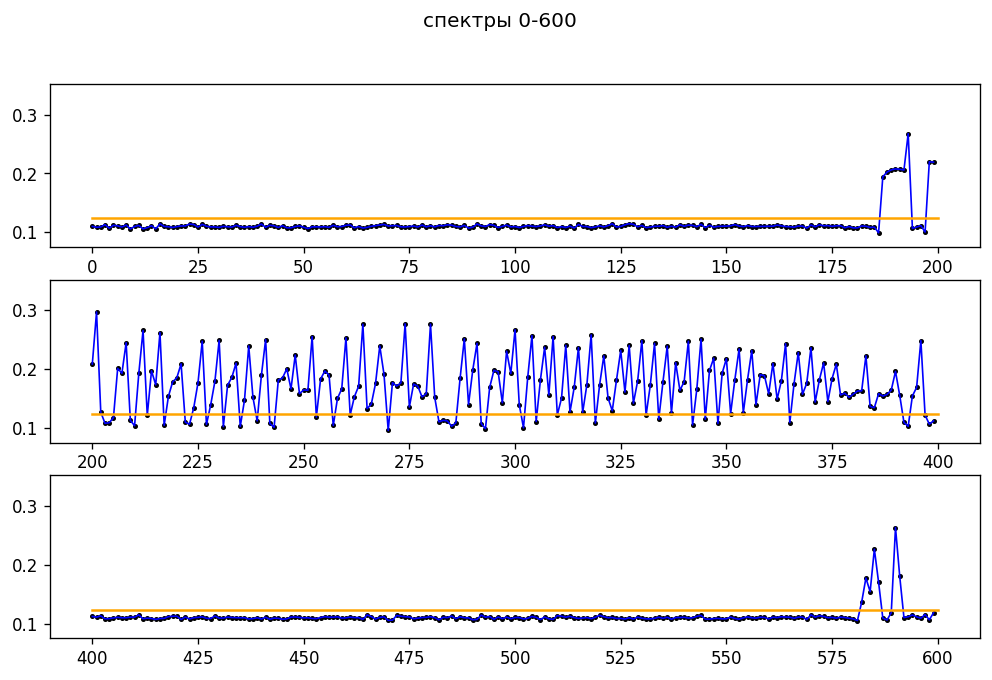

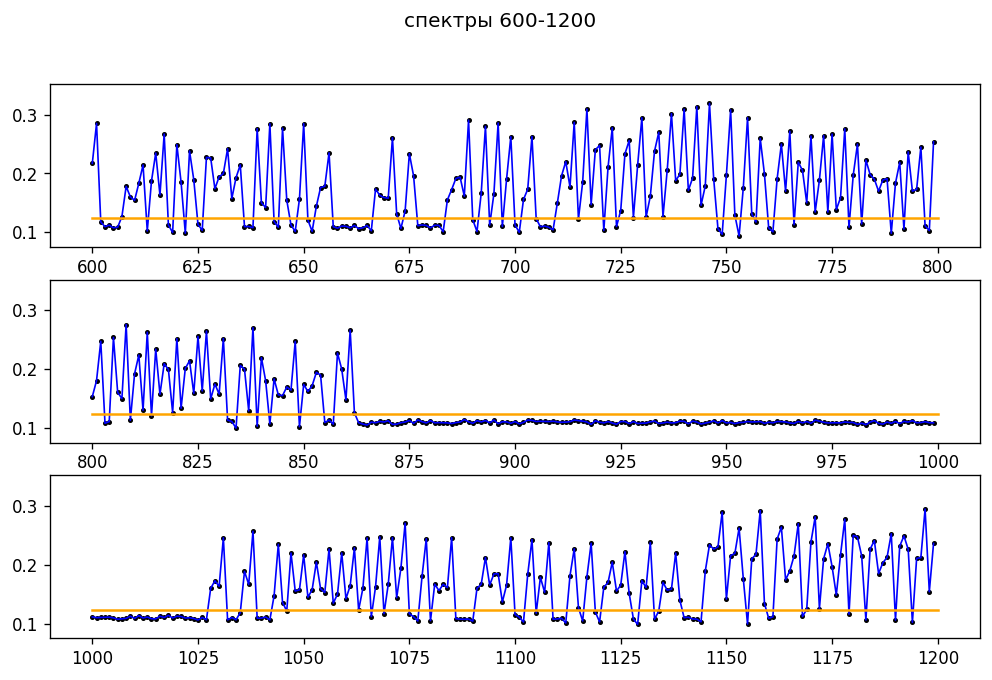

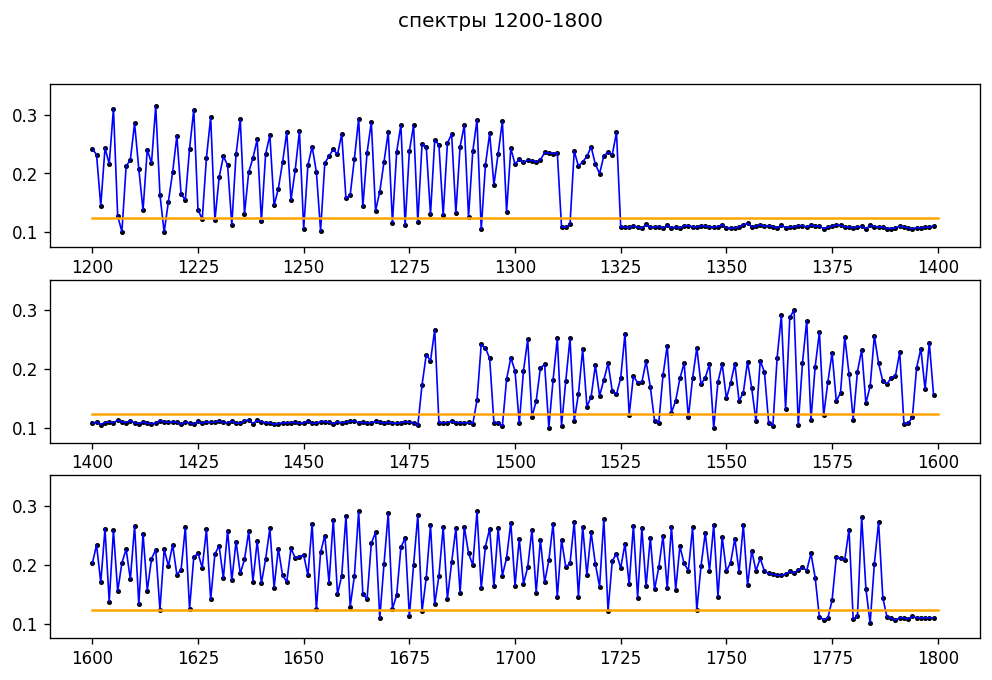

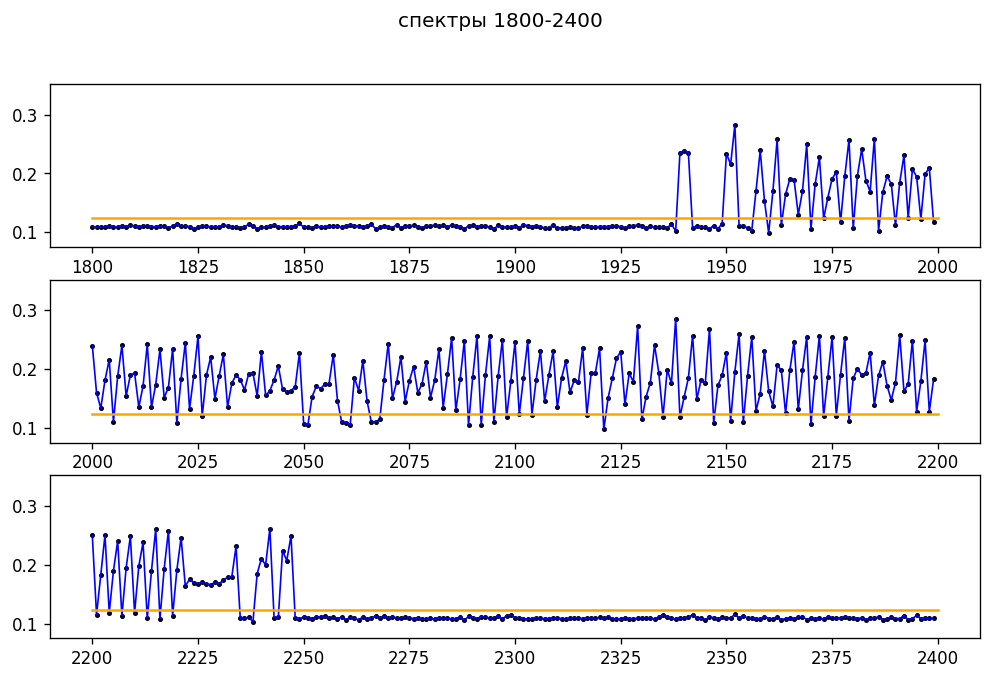

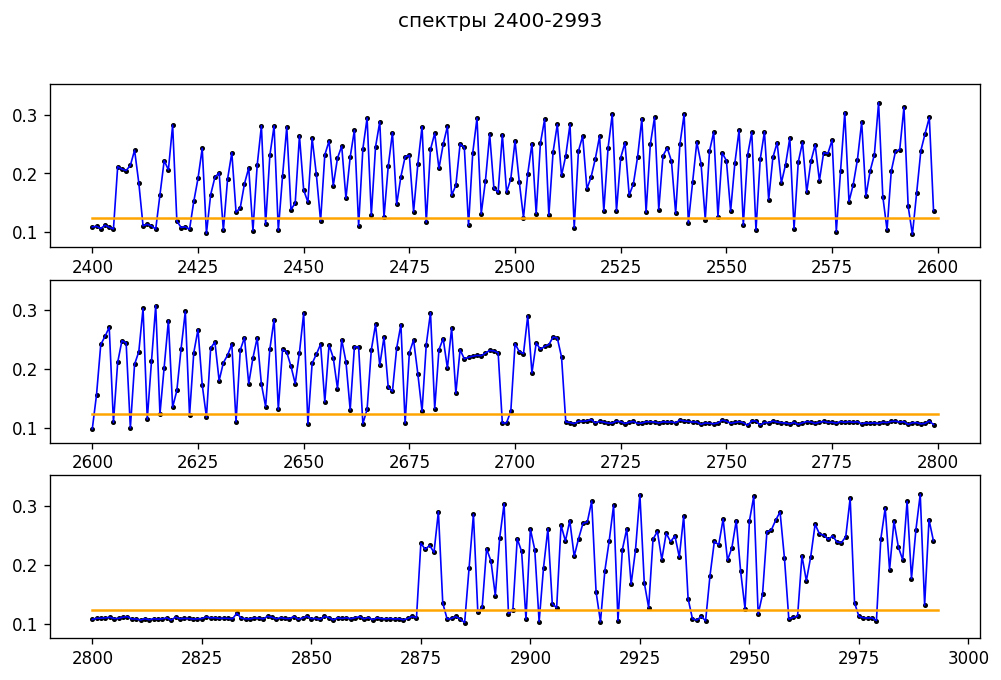

In [80]:
_step = 200
_sp = 0
_ep = _step
_max = np.max(data_max)
# создание папки для сохранения картинок
script_path = os.path.dirname(os.path.abspath("sorter.ipynb"))
folder_name = "timelines"
if not os.path.exists(os.path.join(script_path, folder_name)):
    os.makedirs(os.path.join(script_path, folder_name))

# расчет гистограммы
num_bins = 15  # количество интервалов
range_values = (np.max(data_max) - np.min(data_max)) / num_bins
# границы интервалов
bin_edges = np.arange(np.min(data_max), np.max(data_max) + range_values, range_values)
# середины интервалов
bins = bin_edges[:-1] + range_values / 2

hist, _ = np.histogram(data_max, bins=bin_edges)

zero=bin_edges[np.argmax(hist)+1]
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
fig.suptitle("гистограмма")
ax.hist(data_max, bin_edges, alpha=0.6, color="blue", edgecolor="k", linewidth=1)
ax.plot(bins, hist, color="red", lw=2)
plt.xticks(rotation=90)
ax.set_xticks(bin_edges)
plt.savefig(script_path + "/" + folder_name + "/" + "гистограмма.png")

m=np.min(data_max)*0.8
m2=np.max(data_max)*1.1
for i in range(round(len(data_max) / (3 * _step))):
    fig, axs = plt.subplots(3, 1, figsize=(10, 6), dpi=120)
    _s = _sp

    for j in range(3):

        if _ep > len(data_max):
            _ep = len(data_max)
        axs[j].plot(np.arange(_sp, _ep, 1), data_max[_sp:_ep], lw=1, color="blue")
        axs[j].scatter(np.arange(_sp, _ep, 1), data_max[_sp:_ep], s=4, color="black")
        axs[j].plot((_sp,_ep),(zero,zero),color="orange")
        axs[j].set_ylim(m, m2)
        _sp += _step
        _ep += _step

    _e = _ep - _step
    fig.suptitle("спектры " + str(_s) + "-" + str(_e))
    plt.savefig(
        script_path
        + "/"
        + folder_name
        + "/"
        + "ряд максимумов "
        + str(_s)
        + "-"
        + str(_e)
        + ".png"
    )

In [66]:
point_index=[]
_point=False
k=[]
for i in range(0,len(data_max),20):
    ar=np.max(data_max[i:i+20])
    if ar>zero:
        k.append(i)
        _point=True
    if ar<zero and _point==True:
        point_index.append((k[0],i))   
        k=[]
        _point=False
    if _point==True and i>=len(data_max)-20:
        point_index.append((k[0],len(data_max)-1))   
print(len(point_index))
print(point_index)


7
[(180, 400), (580, 880), (1020, 1340), (1460, 1800), (1920, 2260), (2400, 2720), (2860, 2992)]


In [71]:
folder_name = "points"
if os.path.exists(os.path.join(script_path, folder_name)):
    shutil.rmtree(script_path+'/'+folder_name)
os.makedirs(os.path.join(script_path, folder_name))
for i in range(len(point_index)):
    os.makedirs(os.path.join(script_path+'/'+folder_name,"step "+str(i)))

In [79]:
file_list= np.array(natsorted(os.listdir(script_path+'/')))
print(script_path+'/'+str(file_list[1]))
for i in range(len(point_index)):
    dist=script_path+'/'+folder_name+"/step "+str(i)
    for j in range(point_index[i][0],point_index[i][1]):
        shutil.copy2(script_path+'/'+str(file_list[j]), dist)
    print("step ",i,' ',point_index[i][1]-point_index[i][0])

        

C:/Users/Nik/Desktop/prog/п3/Absorbance__1__15-50-20-068.rmn
step  0   220
step  1   300
step  2   320
step  3   340
step  4   340
step  5   320
step  6   132
